<a href="https://colab.research.google.com/github/ReyhaneNikoobayan/violence-Detection/blob/main/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tqdm import tqdm

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Update paths to your dataset in Google Drive
violence = '/content/drive/My Drive/RLVS/Real Life Violence Dataset/Violence'
non_violence = '/content/drive/MyDrive/RLVS/Real Life Violence Dataset/NonViolence'

# 3. Function to read exactly 50 evenly spaced frames from each video
def read_videos_from_folder(folder_path, label):
    videos = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".mp4"):
            video_path = os.path.join(folder_path, filename)
            cap = cv2.VideoCapture(video_path)
            frames = []
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < 30:
                print(f"Skipping {filename}: only {total_frames} frames.")
                cap.release()
                continue
            frame_indices = [int(i * total_frames / 30) for i in range(30)]
            frame_count = 0
            index_set = set(frame_indices)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_count in index_set:
                    resized_frame = cv2.resize(frame, (128, 128))
                    frames.append(resized_frame)
                    if len(frames) == 30:
                        break
                frame_count += 1
            cap.release()
            if len(frames) == 30:
                videos.append(frames)
                labels.append(label)
            else:
                print(f"Skipped {filename}: collected {len(frames)} frames.")
    return videos, labels

# 4. Read videos
videos_violence_RLVS, labels_violence_RLVS = read_videos_from_folder(violence, 'violence')
videos_non_violence_RLVS, labels_non_violence_RLVS = read_videos_from_folder(non_violence, 'non_violence')

# 5. Combine and summarize
all_videos_RLVS = videos_violence_RLVS + videos_non_violence_RLVS
all_labels_RLVS = labels_violence_RLVS + labels_non_violence_RLVS

print(f"✅ Total videos RLVS loaded: {len(all_videos_RLVS)}")



Mounted at /content/drive


  7%|▋         | 73/1000 [00:18<00:34, 26.53it/s]

Skipping NV_940.mp4: only 29 frames.


100%|██████████| 1000/1000 [01:29<00:00, 11.19it/s]

✅ Total videos RLVS loaded: 1835


In [ ]:
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from tqdm import tqdm

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Update paths to your dataset in Google Drive
train_violence = '/content/drive/My Drive/RWF2000/RWF-2000/train/Fight'
train_non_violence='/content/drive/My Drive/RWF2000/RWF-2000/train/NonFight'
val_violence= '/content/drive/My Drive/RWF2000/RWF-2000/val/Fight'
val_non_violence = '/content/drive/My Drive/RWF2000/RWF-2000/val/NonFight'

# 3. Function to read exactly 30 evenly spaced frames from each video
def read_videos_from_folder(folder_path, label):
    videos = []
    labels = []
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".avi"):
            video_path = os.path.join(folder_path, filename)
            cap = cv2.VideoCapture(video_path)
            frames = []
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < 30:
                print(f"Skipping {filename}: only {total_frames} frames.")
                cap.release()
                continue
            frame_indices = [int(i * total_frames / 30) for i in range(30)]
            frame_count = 0
            index_set = set(frame_indices)
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_count in index_set:
                    resized_frame = cv2.resize(frame, (128, 128))
                    frames.append(resized_frame)
                    if len(frames) == 30:
                        break
                frame_count += 1
            cap.release()
            if len(frames) == 30:
                videos.append(frames)
                labels.append(label)
            else:
                print(f"Skipped {filename}: collected {len(frames)} frames.")
    return videos, labels

# 4. Read videos
videos_violence_RWF_train, labels_violence_RWF_train = read_videos_from_folder(train_violence, 'violence')
videos_non_violence_RWF_train, labels_non_violence_RWF_train = read_videos_from_folder(train_non_violence, 'non_violence')

videos_violence_RWF_val, labels_violence_RWF_val = read_videos_from_folder(val_violence, 'violence')
videos_non_violence_RWF_val, labels_non_violence_RWF_val = read_videos_from_folder(val_non_violence, 'non_violence')


# 5. Combine and summarize
all_videos_train_RWF = videos_violence_RWF_train + videos_non_violence_RWF_train
all_labels_train_RWF = labels_violence_RWF_train+ labels_non_violence_RWF_train

all_videos_val_RWF = videos_violence_RWF_val + videos_non_violence_RWF_val
all_labels_val_RWF= labels_violence_RWF_val+ labels_non_violence_RWF_val

print(f"✅ Total RwF train_videos loaded: {len(all_videos_train_RWF)}")
print(f"✅ Total RWF val_videos loaded: {len(all_videos_val_RWF)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 200/200 [01:45<00:00,  1.90it/s]

✅ Total RwF train_videos loaded: 1599
✅ Total RWF val_videos loaded: 400


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assume you have your labels in a list or array
# For example, labels could be something like this:
# all_labels = ['violence', 'non-violence', 'violence', ...]

# Convert your video list and label list to numpy arrays for easier splitting
all_videos_RLVS = np.array(all_videos_RLVS)
all_videos_train_RWF= np.array(all_videos_train_RWF)
all_videos_val_RWF = np.array(all_videos_val_RWF)

all_labels_RLVS = np.array(all_labels_RLVS)  # Use the string labels
all_labels_train_RWF = np.array(all_labels_train_RWF)
all_labels_val_RWF= np.array(all_labels_val_RWF)




# Encode the string labels to integer labels
label_encoder = LabelEncoder()

all_labels_RLVS_encoded = label_encoder.fit_transform(all_labels_RLVS)
all_labels_train_RWF_encoded = label_encoder.fit_transform(all_labels_train_RWF)
all_labels_val_RWF_encoded = label_encoder.fit_transform(all_labels_val_RWF)



# Split into training (80%) and val (20%)
all_videos_train_RLVS, all_videos_val_RLVS, all_labels_train_RLVS,all_labels_val_RLVS = train_test_split(
    all_videos_RLVS, all_labels_RLVS_encoded, test_size=0.2, random_state=42, shuffle=True)



print(f"Training videos RLVS: {len(all_videos_train_RLVS)}")
print(f"Validation videos RLVS: {len(all_videos_val_RLVS)}")

print(f"Training videos RWF: {len(all_videos_train_RWF)}")
print(f"Validation videos RWF: {len(all_videos_val_RWF)}")






Training videos RLVS: 1468
Validation videos RLVS: 367
Training videos RWF: 1599
Validation videos RWF: 400


In [ ]:
import numpy as np
from sklearn.utils import shuffle

# Combine training sets
combined_videos_train = np.concatenate((all_videos_train_RLVS, all_videos_train_RWF))
combined_labels_train = np.concatenate((all_labels_train_RLVS, all_labels_train_RWF_encoded))  # Make sure both are encoded

# Combine validation sets
combined_videos_val = np.concatenate((all_videos_val_RLVS, all_videos_val_RWF))
combined_labels_val = np.concatenate((all_labels_val_RLVS, all_labels_val_RWF_encoded))  # Make sure both are encoded

# Shuffle training data
x_train, labels_train = shuffle(combined_videos_train, combined_labels_train, random_state=42)

# Shuffle validation data
x_val, labels_val = shuffle(combined_videos_val, combined_labels_val, random_state=42)

# Check sizes
print(f"Total training videos: {len(x_train)}")
print(f"Total validation videos: {len(x_val)}")


Total training videos: 3067
Total validation videos: 767


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class VideoDataset(Dataset):
    def __init__(self, videos, labels):
        self.videos = videos
        self.labels = labels

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = self.videos[idx]
        label = self.labels[idx]
        video = video / 255.0
        # Convert to tensors
        video = torch.tensor(video, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)
        return video, label

# Create datasets
train_dataset = VideoDataset(x_train, labels_train)
val_dataset = VideoDataset(x_val, labels_val)
test_dataset_RLVS = VideoDataset(all_videos_val_RLVS, all_labels_val_RLVS)
test_dataset_RWF = VideoDataset(all_videos_val_RWF, all_labels_val_RWF_encoded)

# Create data loaders
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_RLVS = DataLoader(test_dataset_RLVS, batch_size=batch_size, shuffle=False)
test_loader_RWF= DataLoader(test_dataset_RWF, batch_size=batch_size, shuffle=False)

# Print the sizes of the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size RLVS: {len(test_dataset_RLVS)}")
print(f"Test set size RWF: {len(test_dataset_RWF)}")

# Example of iterating through the data loader
for videos, labels in train_loader:
    print(videos.shape, labels.shape)
    break


Training set size: 3067
Validation set size: 767
Test set size RLVS: 367
Test set size RWF: 400
torch.Size([64, 30, 128, 128, 3]) torch.Size([64])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

# Transformer Model for Video Classification
class VideoTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, num_classes):
        super(VideoTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.pos_encoder = PositionalEncoding(embed_dim)
        encoder_layers = TransformerEncoderLayer(embed_dim, num_heads, embed_dim*4)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        # Flatten spatial dimensions
        batch_size, seq_len, h, w, c = x.size()
        x = x.view(batch_size, seq_len, -1)  # Shape: (batch_size, seq_len, h * w * c)

        # Embedding
        x = self.embedding(x)  # Shape: (batch_size, seq_len, embed_dim)
        x = self.pos_encoder(x.permute(1, 0, 2))  # Shape: (seq_len, batch_size, embed_dim)

        # Transformer Encoder
        x = self.transformer_encoder(x)  # Shape: (seq_len, batch_size, embed_dim)

        # Classification Head
        x = x.mean(dim=0)  # Shape: (batch_size, embed_dim)
        x = self.fc(x)  # Shape: (batch_size, num_classes)
        return x


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/60], Loss: 0.7922918697198232, Train Accuracy: 50.04890772742093%
Validation Loss: 0.6930754234393438, Validation Accuracy: 49.02216427640156%
Epoch [2/60], Loss: 0.6998809824387232, Train Accuracy: 50.21193348549071%
Validation Loss: 0.6926834831635157, Validation Accuracy: 50.97783572359844%
Epoch [3/60], Loss: 0.6950217721362909, Train Accuracy: 50.24453863710466%
Validation Loss: 0.6990236391623815, Validation Accuracy: 50.97783572359844%
Epoch [4/60], Loss: 0.7047503044207891, Train Accuracy: 52.26605803716987%
Validation Loss: 0.7270281314849854, Validation Accuracy: 50.97783572359844%
Epoch [5/60], Loss: 0.703460942953825, Train Accuracy: 50.1467231822628%
Validation Loss: 0.6966406106948853, Validation Accuracy: 50.97783572359844%
Epoch [6/60], Loss: 0.6951782132188479, Train Accuracy: 50.37495924356048%
Validation Loss: 0.7009394417206446, Validation Accuracy: 49.02216427640156%
Epoch [7/60], Loss: 0.6977709333101908, Train Accuracy: 51.22269318552331%
Validation Loss

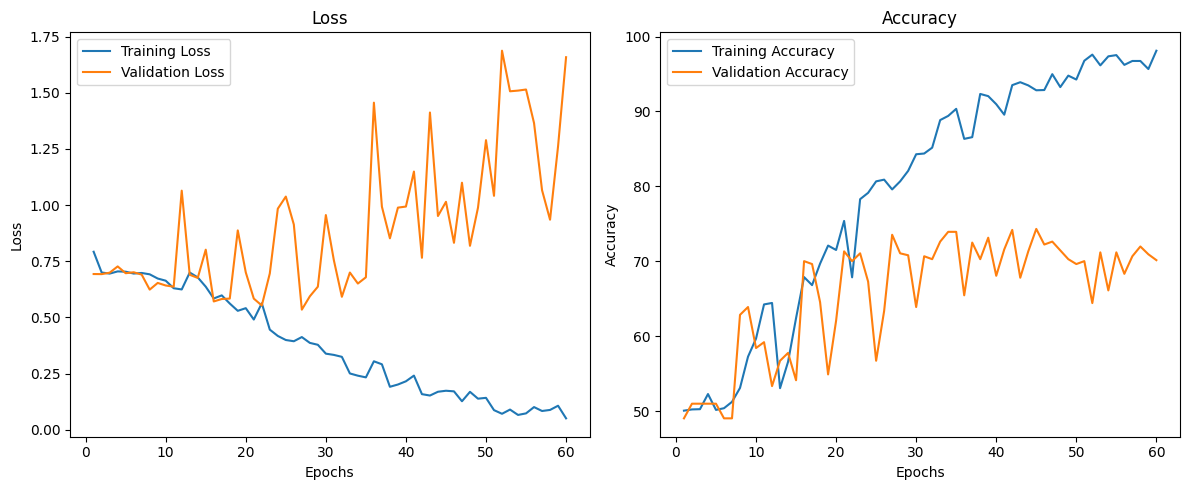

NameError: name 'test_loader' is not defined

In [ ]:
# Model parameters
input_dim = 128 * 128 * 3
embed_dim = 512
num_heads = 8
num_layers = 6
num_classes = 2

# Initialize the model, loss function, and optimizer
model = VideoTransformer(input_dim, embed_dim, num_heads, num_layers, num_classes)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# Training loop
num_epochs = 60
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for videos, labels in train_loader:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        videos, labels = videos.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(videos)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}, Train Accuracy: {train_accuracy}%')

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for videos, labels in val_loader:
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
            videos, labels = videos.to(device), labels.to(device)
            outputs = model(videos)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss/len(val_loader)}, Validation Accuracy: {val_accuracy}%')

# Plotting loss and accuracy
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

# Save the model
torch.save(model.state_dict(), 'video_transformer.pth')

# Test the model and plot confusion matrix
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_preds = []
with torch.no_grad():
    for videos, labels in test_loader:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        videos, labels = videos.to(device), labels.to(device)
        outputs = model(videos)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f'Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {test_accuracy}%')
class_names=['nonviolence','violence']
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
cm_display = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_names,yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params:,}")

def get_model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

model_size_mb = get_model_size(model)
print(f"Model size: {model_size_mb:.2f} MB")

Total trainable parameters: 44,081,666
Model size: 177.92 MB
